In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "index.csv"
data = pd.read_csv(data_path)

In [2]:
# Display basic info about the dataset
print("Dataset Information:")
data.info()
print("\nFirst 5 rows:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB

First 5 rows:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004

In [3]:
# Convert date and datetime columns to datetime objects
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [4]:
# Handle missing values
print("\nMissing values per column:")
print(data.isnull().sum())
data['card'] = data['card'].fillna('Unknown')  # Fill missing card data with 'Unknown'


Missing values per column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
                                date                       datetime  \
count                           1133                           1133   
mean   2024-05-19 11:36:29.232127232  2024-05-20 02:38:39.053382912   
min              2024-03-01 00:00:00     2024-03-01 10:15:50.520000   
25%              2024-04-14 00:00:00  2024-04-14 10:55:27.406000128   
50%              2024-05-23 00:00:00  2024-05-23 12:22:06.604999936   
75%              2024-06-22 00:00:00  2024-06-22 08:39:50.272999936   
max              2024-07-31 00:00:00     2024-07-31 21:55:16.570000   
std                              NaN                            NaN   

             money  
count  1133.000000  
mean     33.105808  
min      18.120000  
25%      28.900000  
50%      32.820000  
75%      37.720000  
max      40.000000  
std       5.035366  


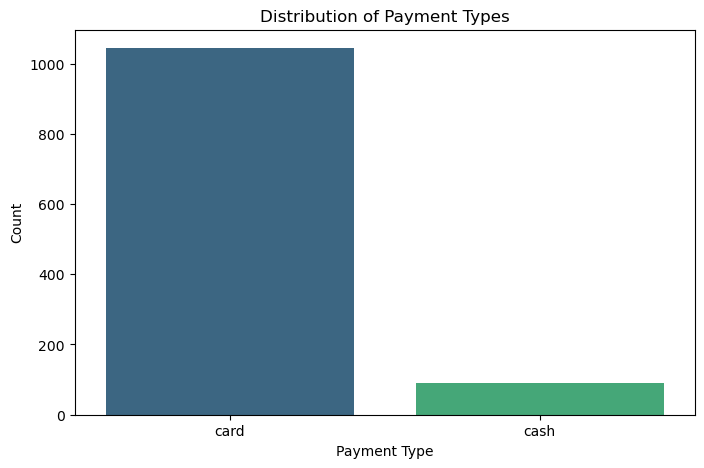

In [6]:

# 1. Distribution of payment types
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='cash_type', palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()


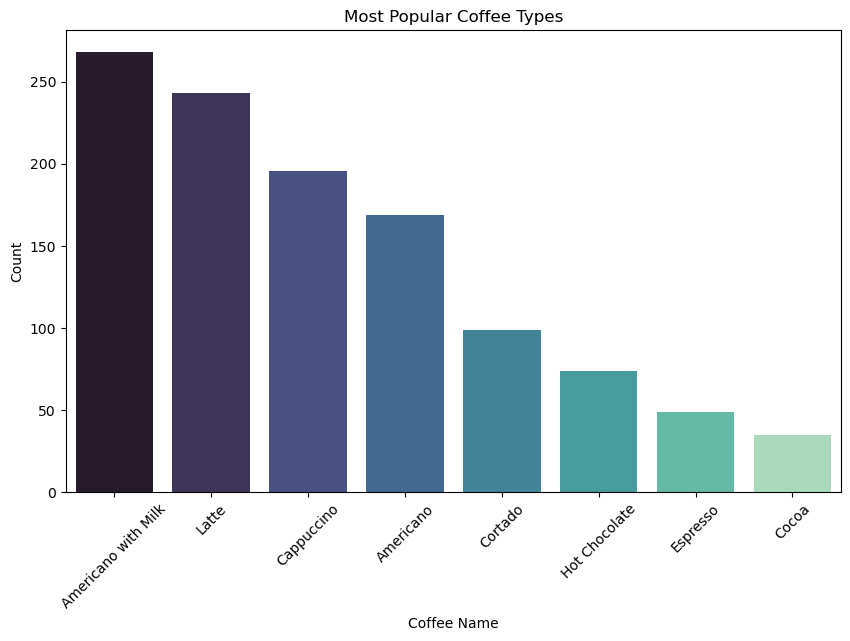

In [7]:
# 2. Most popular coffee types
plt.figure(figsize=(10, 6))
coffee_counts = data['coffee_name'].value_counts()
sns.barplot(x=coffee_counts.index, y=coffee_counts.values, palette='mako')
plt.title('Most Popular Coffee Types')
plt.xlabel('Coffee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

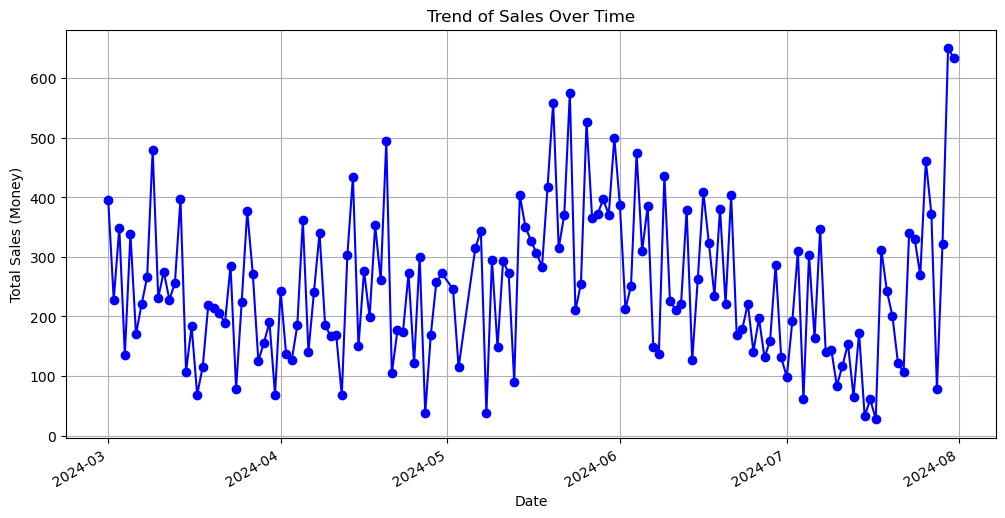

In [8]:
# 3. Trend of sales over time
plt.figure(figsize=(12, 6))
sales_trend = data.groupby('date')['money'].sum()
sales_trend.plot(marker='o', color='blue')
plt.title('Trend of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (Money)')
plt.grid()
plt.show()

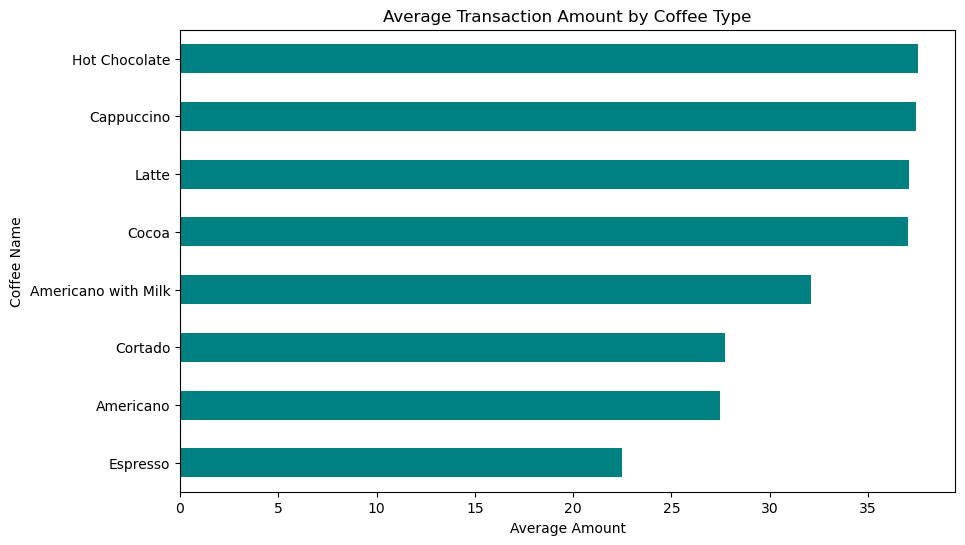

In [9]:
# 4. Average transaction amount by coffee type
plt.figure(figsize=(10, 6))
avg_transaction = data.groupby('coffee_name')['money'].mean().sort_values()
avg_transaction.plot(kind='barh', color='teal')
plt.title('Average Transaction Amount by Coffee Type')
plt.xlabel('Average Amount')
plt.ylabel('Coffee Name')
plt.show()
